0.7853981633974485
[[0.7853981633974485]]
[0.7853981633974485]
[1.7268126567582365, 2.040617487878499]
[1.9605341665638947, 2.038441336499114, 2.0382962597404886]
[2.0187939480778536, 2.0382138752491734, 2.038198711165844, 2.03819716277577]
[2.033347341805016, 2.0381984730474034, 2.0381974462339523, 2.0381974261556683, 2.0381974271885306]

 ======= Integral of (x*x+x+1)*cos(x) between 0 and pi/2 =  2.03819742718853e+00 
  True error =  1.2129053e-10
  Est. error =  1.0328622e-09
  Number of intervals = 32


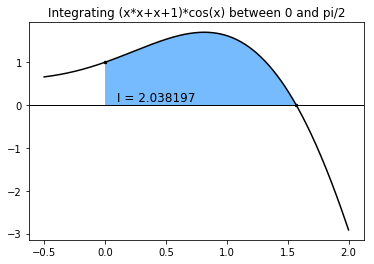

In [25]:
from numpy import *
import matplotlib.pyplot as plt

def trapezeEasy(f,a,b,n):
    i = linspace(a,b,n+1)
    U = f(i)
    h = (b - a)/(n)
    I = h * (U[0]/2 + U[-1]/2 +  sum(U[1:-1]))
    return I

def richard(I0 , I1 , j ):
    A = 2**(2*j)
    return (A*I1 - I0)/(A-1)

def romberg(f,a,b,n,nmax,tol):
    matrix = [[trapezeEasy(f,a,b,n)]]
    print(trapezeEasy(f,a,b,n))
    print(matrix)
    
    error = 1  #matrix[1][0] - matrix[0][0]
    
    i = 1
    n = n * 2
    
    while error > tol and n<nmax:
        matrix.append([])
        matrix[i].append(trapezeEasy(f,a,b,n))
        for it in range(1,i+1):
            matrix[i].append(richard(matrix[i-1][it-1], matrix[i][it-1],it))
        
        error = abs(matrix[i][-1] - matrix[i][-2])
        
        n = n*2
        i += 1
    for elm in matrix:
        print(elm)
    I = matrix[i-1][-1]
    return I,n,error
    
    
    
    
def u(x):
    return (x*x+x+1)*cos(x)
  
a = 0
b = pi/2
n = 1
 
 
I,n,errorEst = romberg(u,a,b,n,100,1e-8)
errorExact = abs(2.03819742706724 - I)
print("\n ======= Integral of (x*x+x+1)*cos(x) between 0 and pi/2 = %21.14e " % I)
print("  True error = %14.7e" % errorExact)
print("  Est. error = %14.7e" % errorEst)
print("  Number of intervals = %d" % n)
 
 
 
plt.figure("Mastering the trapezoids integration rule :-)")
x = array([a,b])
plt.plot(x,u(x),'.k',markersize=5) 
x = linspace(a,b,200)
plt.fill(append(x,[0]),append(u(x),[0]),'xkcd:sky blue')
x = linspace(-0.5,2.0,300)
plt.plot(x,u(x),'-k')
plt.title('Integrating (x*x+x+1)*cos(x) between 0 and pi/2')
plt.gca().axhline(y=0,color='k',linewidth=1.0)
plt.text(0.1,0.1,"I = %8.6f" % I,fontsize=12)
plt.show()